Plot ACFs

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 

import pickle
import numpy as np
import pandas as pd

from isttc.scripts.cfg_global import project_folder_path
from isttc.tau import func_single_exp_monkey

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'synthetic_dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'

save_fig = False

### Load data (spike trains and calculated acf's)

In [3]:
with open(results_folder + 'tau_pearsonr_trial_50ms_20lags_dict.pkl', "rb") as f:
    pearsonr_trial_avg_dict = pickle.load(f)

with open(results_folder + 'tau_isttc_trial_concat_50ms_20lags_dict.pkl', "rb") as f:
    sttc_trial_concat_dict = pickle.load(f)

print(f'len pearsonr_trial_avg_dict {len(pearsonr_trial_avg_dict)}')
print(f'len sttc_trial_concat_dict {len(sttc_trial_concat_dict)}')

summary_tau_df = pd.read_pickle(results_folder + 'summary_tau_all_long_df_all_units.pkl')
print(f'len summary_tau_df {len(summary_tau_df)}')

len pearsonr_trial_avg_dict 100000
len sttc_trial_concat_dict 100000
len summary_tau_df 400000


In [ ]:
summary_tau_df['method'].unique()

In [4]:
summary_tau_df_subset = summary_tau_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"')[['unit_id', 'fit_r_squared',
       'acf_decline', 'method', 'tau_ms', 'fr', 'alpha', 'tau_ms_true',
       'tau_diff_abs', 'tau_diff_rel', 'ci_width', 'lv']].copy()
summary_tau_df_subset

,unit_id,fit_r_squared,acf_decline,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
200000,0,9.720046e-01,True,pearsonr_trial_avg,252.749919,7.741821,0.851099,150.923515,101.826404,67.468879,2.481346e+00,1.307775
200001,1,9.449981e-01,True,pearsonr_trial_avg,101.021800,4.394396,0.858098,147.947233,46.925433,31.717682,1.113860e+00,1.345006
200002,2,7.739549e-01,False,pearsonr_trial_avg,3999.934263,8.587393,0.528805,267.002290,3732.931973,1398.089874,1.497794e+03,1.068416
200003,3,4.124573e-01,True,pearsonr_trial_avg,548.658840,6.976707,0.300692,194.403797,354.255043,182.226402,6.659827e+01,1.055631
200004,4,6.726889e-02,False,pearsonr_trial_avg,94.195485,0.950832,0.691458,239.986489,145.791004,60.749672,1.602888e+01,1.357205
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,99995,1.668135e-01,True,sttc_trial_concat,33.636771,2.672839,0.244627,125.243251,91.606480,73.142848,4.494896e+00,1.178739
399996,99996,8.239274e-01,True,sttc_trial_concat,81.160755,5.754497,0.596987,94.481295,13.320540,14.098600,1.725054e+00,1.353800
399997,99997,4.651321e-02,False,sttc_trial_concat,78.711292,5.604441,0.258915,174.189672,95.478381,54.812883,1.642344e+01,1.064661
399998,99998,5.247993e-01,False,sttc_trial_concat,3.927150,1.219057,0.187620,76.565797,72.638647,94.870882,6.192650e-03,1.306500


In [ ]:
summary_tau_df_subset.keys()

In [5]:
# get units for which isttc performed better (with fr <= 2.5 and alpha >= 0.7 and at least 20% less REE)
df = summary_tau_df_subset.copy()

# mask_basic = (df['alpha'] >= 0.5)
mask_basic = (df['alpha'] < 0.3)
df_basic = df[mask_basic]

# compute tau_diff_rel difference per unit
pivot = df_basic.pivot(index='unit_id', columns='method', values='tau_diff_rel')
# isttc_full is at least 20 lower than acf_full
# cond_diff20 = pivot['sttc_trial_concat'] <= (pivot['pearsonr_trial_avg'] - 20)
cond_diff20 = pivot['pearsonr_trial_avg'] <= (pivot['sttc_trial_concat'] - 20)
# isttc_full <= 10
cond_isttc10 = pivot['pearsonr_trial_avg'] <= 10
# cond_isttc10 = pivot['sttc_trial_concat'] <= 5
# Units satisfying both conditions
selected_units = pivot[cond_diff20 & cond_isttc10].index

df_final = (
    df_basic[df_basic['unit_id'].isin(selected_units)]
    .sort_values(by='unit_id')
    .reset_index(drop=True)
)

df_final

,unit_id,fit_r_squared,acf_decline,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
0,80,0.099753,False,pearsonr_trial_avg,206.716830,6.646492,0.188714,220.958779,14.241949,6.445523,32.654815,1.029327
1,80,0.079368,False,sttc_trial_concat,67.907916,6.646492,0.188714,220.958779,153.050863,69.266704,10.833515,1.029327
2,87,0.180514,True,sttc_trial_concat,45.452506,4.624154,0.237363,74.727206,29.274700,39.175425,4.996562,1.166995
3,87,0.242688,False,pearsonr_trial_avg,73.892485,4.624154,0.237363,74.727206,0.834721,1.117024,6.051098,1.166995
4,293,0.315946,True,pearsonr_trial_avg,170.574332,1.000140,0.103052,165.593302,4.981030,3.007990,12.345359,1.175929
...,...,...,...,...,...,...,...,...,...,...,...,...
889,99005,0.312672,True,sttc_trial_concat,51.687900,9.827922,0.284463,71.729661,20.041762,27.940689,3.795745,1.119455
890,99509,0.205197,True,sttc_trial_concat,18.846117,7.120463,0.175255,57.377599,38.531482,67.154225,4.175584,1.120407
891,99509,0.121016,False,pearsonr_trial_avg,58.299549,7.120463,0.175255,57.377599,0.921950,1.606812,7.558137,1.120407
892,99926,0.030691,False,sttc_trial_concat,512.929800,7.598423,0.287411,225.542852,287.386947,127.420109,276.680499,1.051230


### Plot

In [6]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2' 
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_concat = '#955da2' 

#colors = [color_acf_full, color_isttc_full]

In [7]:
def plot_acfs(unit_to_plot, fig_folder):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

    n_lags = 20
    t = np.linspace(0, n_lags, n_lags).astype(int)
    
    axes[0].plot(t[1:], sttc_trial_concat_dict[unit_to_plot]['acf'][0][1:], lw=0, color=color_sttc_trail_concat, alpha=1, marker='o', markersize='5')
    axes[0].plot(t[1:], func_single_exp_monkey(t[1:], *sttc_trial_concat_dict[unit_to_plot]['taus'][0]['popt']), color=color_sttc_trail_concat)
    
    axes[1].plot(t[1:], pearsonr_trial_avg_dict[unit_to_plot]['acf'][0][1:], lw=0, color=color_pearson_trail_avg, alpha=1, marker='o', markersize='5')
    axes[1].plot(t[1:], func_single_exp_monkey(t[1:], *pearsonr_trial_avg_dict[unit_to_plot]['taus'][0]['popt']), color=color_pearson_trail_avg)
    
    # get analytical tau
    alpha = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['alpha'].values[0] 
    tau_ms = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['tau_ms_true'].values[0]   
    fr = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['fr'].values[0]   
    
    lags = np.linspace(0, 950, 20)
    acf_shape = np.exp(-lags / tau_ms)
    
    # iSTTC scaling
    isttc_emp = sttc_trial_concat_dict[unit_to_plot]['acf'][0]
    isttc_scale = isttc_emp[1] / acf_shape[1]
    isttc_acf_analytical_scaled = isttc_scale * acf_shape
    
    # ACF scaling
    acf_emp = pearsonr_trial_avg_dict[unit_to_plot]['acf'][0]
    acf_scale = acf_emp[1] / acf_shape[1]
    acf_acf_analytical_scaled = acf_scale * acf_shape
    
    # lags = np.linspace(0, 1000, 21) 
    # acf_analytical = np.exp(-np.abs(lags) / tau_ms)
    
    # isttc_scale = isttc_full_dict[unit_to_plot]['acf'][1] 
    # isttc_acf_analytical_scaled = isttc_scale * np.exp(-lags / tau_ms)
    
    # acf_scale = acf_full_dict[unit_to_plot]['acf'][1] 
    # acf_acf_analytical_scaled = acf_scale * np.exp(-lags / tau_ms)
    
    axes[0].plot(t[1:], isttc_acf_analytical_scaled[1:], lw=1, color='k', alpha=1)
    axes[1].plot(t[1:], acf_acf_analytical_scaled[1:], lw=1, color='k', alpha=1)
    
    fig.suptitle(f'Unit {unit_to_plot}: alpha {alpha:.2f}, fr {fr:.2f} Hz, tau {tau_ms:.2f} ms', y=1.1)
    
    isttc_ree = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['tau_diff_rel'].values[0]
    isttc_r2 = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['fit_r_squared'].values[0]
    isttc_tau = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['tau_ms'].values[0]
    axes[0].set_title(f'iSTTC: REE {isttc_ree:.2f}%, R-squared {isttc_r2:.2f},\n tau {isttc_tau:.2f}')
    
    acf_ree = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['tau_diff_rel'].values[0]
    acf_r2 = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['fit_r_squared'].values[0]
    acf_tau = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['tau_ms'].values[0]
    axes[1].set_title(f'PearsonR: REE {acf_ree:.2f}%, R-squared {acf_r2:.2f},\n tau {acf_tau:.2f}')
    
    for ax in axes.flat:
        ax.set_ylabel('ACF (a.u.)')
        ax.set_xlabel('Time (ms)')
        ax.set_xticks(np.linspace(1, 19, 10).astype(int))
        ax.set_xticklabels(np.linspace(50, 950, 10).astype(int))
        ax.set_xlim([0,19])
    
    sns.despine()

    fig.savefig(fig_folder + f"acf_plot_unit_{unit_to_plot}.png", dpi=300, bbox_inches='tight')
    plt.close(fig) 

#### ACFs where iSTTC is better

In [8]:
units_to_plot = df_final.query('method == "sttc_trial_concat"')['unit_id'].values
print(f'len units_to_plot {len(units_to_plot)}')

len units_to_plot 447


In [9]:
for unit_id in units_to_plot:
    plot_acfs(unit_id, results_folder + 'acf_plots\\trials_acf_better\\')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


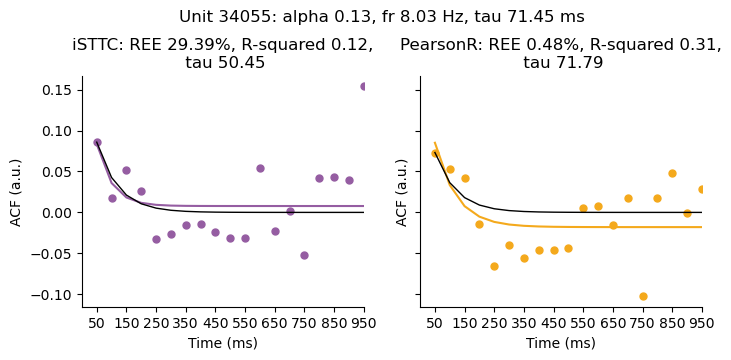

In [13]:
unit_to_plot = 34055

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

n_lags = 20
t = np.linspace(0, n_lags-1, n_lags).astype(int)
print(t)

axes[0].plot(t[1:], sttc_trial_concat_dict[unit_to_plot]['acf'][0][1:], lw=0, color=color_sttc_trail_concat, alpha=1, marker='o', markersize='5')
axes[0].plot(t[1:], func_single_exp_monkey(t[1:], *sttc_trial_concat_dict[unit_to_plot]['taus'][0]['popt']), color=color_sttc_trail_concat)

axes[1].plot(t[1:], pearsonr_trial_avg_dict[unit_to_plot]['acf'][0][1:], lw=0, color=color_pearson_trail_avg, alpha=1, marker='o', markersize='5')
axes[1].plot(t[1:], func_single_exp_monkey(t[1:], *pearsonr_trial_avg_dict[unit_to_plot]['taus'][0]['popt']), color=color_pearson_trail_avg)

# get analytical tau
alpha = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['alpha'].values[0] 
tau_ms = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['tau_ms_true'].values[0]   
fr = summary_tau_df[summary_tau_df['unit_id'] == unit_to_plot]['fr'].values[0]   

lags = np.linspace(0, 950, 20)
acf_shape = np.exp(-lags / tau_ms)

# iSTTC scaling
isttc_emp = sttc_trial_concat_dict[unit_to_plot]['acf'][0]
isttc_scale = isttc_emp[1] / acf_shape[1]
isttc_acf_analytical_scaled = isttc_scale * acf_shape

# ACF scaling
acf_emp = pearsonr_trial_avg_dict[unit_to_plot]['acf'][0]
acf_scale = acf_emp[1] / acf_shape[1]
acf_acf_analytical_scaled = acf_scale * acf_shape

# lags = np.linspace(0, 1000, 21) 
# acf_analytical = np.exp(-np.abs(lags) / tau_ms)

# isttc_scale = isttc_full_dict[unit_to_plot]['acf'][1] 
# isttc_acf_analytical_scaled = isttc_scale * np.exp(-lags / tau_ms)

# acf_scale = acf_full_dict[unit_to_plot]['acf'][1] 
# acf_acf_analytical_scaled = acf_scale * np.exp(-lags / tau_ms)

axes[0].plot(t[1:], isttc_acf_analytical_scaled[1:], lw=1, color='k', alpha=1)
axes[1].plot(t[1:], acf_acf_analytical_scaled[1:], lw=1, color='k', alpha=1)

fig.suptitle(f'Unit {unit_to_plot}: alpha {alpha:.2f}, fr {fr:.2f} Hz, tau {tau_ms:.2f} ms', y=1.1)

isttc_ree = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['tau_diff_rel'].values[0]
isttc_r2 = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['fit_r_squared'].values[0]
isttc_tau = summary_tau_df.query('unit_id == @unit_to_plot and method == "sttc_trial_concat"')['tau_ms'].values[0]
axes[0].set_title(f'iSTTC: REE {isttc_ree:.2f}%, R-squared {isttc_r2:.2f},\n tau {isttc_tau:.2f}')

acf_ree = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['tau_diff_rel'].values[0]
acf_r2 = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['fit_r_squared'].values[0]
acf_tau = summary_tau_df.query('unit_id == @unit_to_plot and method == "pearsonr_trial_avg"')['tau_ms'].values[0]
axes[1].set_title(f'PearsonR: REE {acf_ree:.2f}%, R-squared {acf_r2:.2f},\n tau {acf_tau:.2f}')

for ax in axes.flat:
    ax.set_ylabel('ACF (a.u.)')
    ax.set_xlabel('Time (ms)')
    ax.set_xticks(np.linspace(1, 19, 10).astype(int))
    ax.set_xticklabels(np.linspace(50, 950, 10).astype(int))
    ax.set_xlim([0,19])

sns.despine()

fig.savefig(results_folder + 'acf_plots\\trials_for_rev_acf_better\\' + f"acf_plot_unit_{unit_to_plot}.png", dpi=300, bbox_inches='tight')
fig.savefig(results_folder + 'acf_plots\\trials_for_rev_acf_better\\' + f"acf_plot_unit_{unit_to_plot}.svg", dpi=300, bbox_inches='tight')